In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [97]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T
X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [98]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 1000)
(10, 1000)
(784, 350)
(10, 350)


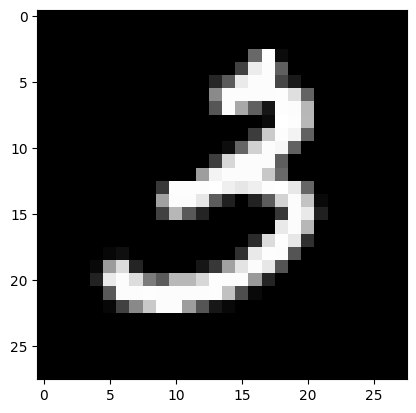

In [99]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[ : , index].reshape(28,28), cmap = 'gray')
# plt.show

# Activation Function

In [100]:
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    expx = np.exp(x)
    return expx / np.sum(expx , axis = 0)

In [101]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$

In [102]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h , n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    # b2 = np.random.randn(n_y, 1)

    parameters ={
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }
    
    return parameters

# Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

In [103]:
def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)
    # print(a1.shape)
    # print(w2.shape)
    # print (b2.shape)
    
    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        'z1' : z1,
        'a1' : a1,
        'z2' : z2,
        'a2' : a2,
    }

    return forward_cache

# Cost Function

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$

In [104]:
def cost_function(a_k,y_k):
    m = y_k.shape[1]
    cost = -(1/m) * (np.sum(y_k * np.log(a_k)))
    return cost

# Backpropagation

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [105]:
def back_propagation(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

# Update Parameters

In [106]:
def upgrade_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    parameters = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }
    return parameters

# Complete Model

In [107]:
def model(x, y , n_h, learning_rate , iteration):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x,n_h,n_y)

    for i in range(iteration):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a2'],y)
        gradients = back_propagation(x, y, parameters,forward_cache)
        parameters = upgrade_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        if i % 10 == 0:
            print('cost in',i,'th iteration is',cost)
        
    return parameters , cost_list

In [108]:
n_h = 1000
learning_rate = 0.02
iteration = 100

parameters , cost_list = model(X_train, Y_train, n_h, learning_rate, iteration)

cost in 0 th iteration is 2.3448467511040274
cost in 10 th iteration is 1.1600565651881003
cost in 20 th iteration is 0.8144326671310634
cost in 30 th iteration is 0.6531866462196226
cost in 40 th iteration is 0.5564785561552232
cost in 50 th iteration is 0.4898971691837884
cost in 60 th iteration is 0.44008188915573626
cost in 70 th iteration is 0.4007364491111843
cost in 80 th iteration is 0.36847684569660183
cost in 90 th iteration is 0.3413035868472775


<function matplotlib.pyplot.show(close=None, block=None)>

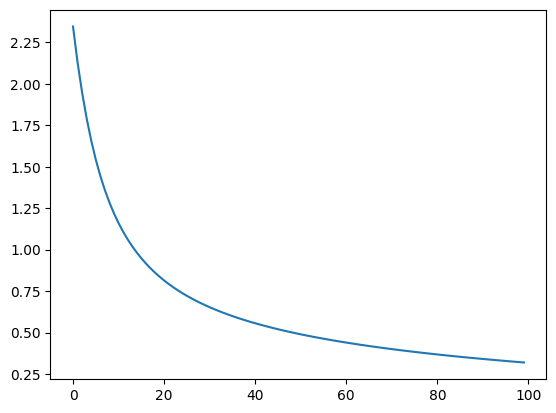

In [109]:
t = np.arange(0,iteration)
plt.plot(t,cost_list)
plt.show

In [110]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']

    a_out = np.argmax(a_out, 0)
    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels) * 100

    return acc

In [111]:
print(f'axxuracy for train data is {accuracy(X_train,Y_train,parameters)}')
# print(f'axxuracy for test data is {accuracy(X_test,Y_test,parameters)}')
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, parameters), 2), "%")

axxuracy for train data is 95.7
Accuracy of Test Dataset 86.57 %


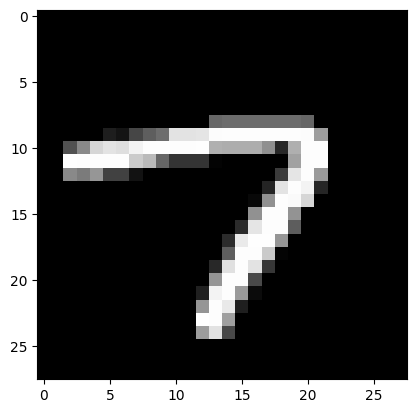

Our model says it is : 7


In [116]:
index = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[ :, index].reshape(28,28),cmap= 'gray')
plt.show()

cache = forward_propagation(X_test[:, index].reshape(X_test[:, index].shape[0], 1), parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])